In [942]:
!pip install pandas
!pip install yfinance

In [943]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series


In [944]:
stock_ticker = 'AAPL'
stock_start_date = datetime.date(2013,12,29)
stock_end_date = datetime.date.today()
stock_df = yf.download(stock_ticker, start=stock_start_date, end=stock_end_date)

[*********************100%***********************]  1 of 1 completed


In [945]:
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-30,19.909286,20.003214,19.725714,19.804285,17.296610,253629600
2013-12-31,19.791786,20.045713,19.785713,20.036428,17.499371,223084400
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874279,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966290,412610800
...,...,...,...,...,...,...
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000
2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000


In [946]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2694 entries, 2013-12-30 to 2024-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2694 non-null   float64
 1   High       2694 non-null   float64
 2   Low        2694 non-null   float64
 3   Close      2694 non-null   float64
 4   Adj Close  2694 non-null   float64
 5   Volume     2694 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 147.3 KB


In [947]:
stock_df.index

DatetimeIndex(['2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-13',
               ...
               '2024-08-29', '2024-08-30', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06', '2024-09-09', '2024-09-10',
               '2024-09-11', '2024-09-12'],
              dtype='datetime64[ns]', name='Date', length=2694, freq=None)

In [948]:
stock_df=stock_df[(stock_df.index.year!=2013)]
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874279,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966290,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844952,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951630,258529600
...,...,...,...,...,...,...
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000
2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000


In [949]:
stock_df_multiple_imputed = stock_df.copy()
stock_df_multiple_imputed['AAPL_Spline']= stock_df_multiple_imputed['Close'].interpolate(method='spline', order=1, limit=10, limit_direction='both')
df_resample = stock_df_multiple_imputed.copy()
df_resample = df_resample[['AAPL_Spline']].round(2)
df_resample

,AAPL_Spline
Date,
2014-01-02,19.75
2014-01-03,19.32
2014-01-06,19.43
2014-01-07,19.29
2014-01-08,19.41
...,...
2024-09-06,220.82
2024-09-09,220.91
2024-09-10,220.11


In [950]:
df_resample_months = df_resample.groupby(pd.Grouper(freq='MS')).median()
df_resample_months
AAPL_April=df_resample_months[:-5]
AAPL_April

,AAPL_Spline
Date,
2014-01-01,19.410
2014-02-01,18.840
2014-03-01,18.980
2014-04-01,18.970
2014-05-01,21.340
...,...
2023-12-01,193.935
2024-01-01,185.920
2024-02-01,184.260


# 3 Economics Factors
I select Apple Inc (NASDAQ: AAPL) as the stock to analyze.
I choose income levels, interest rate, and exchange rate as 3 economics factors to analyze, and I think these 3 variables will help in predicting Apple stock prices.
Income levels:
Apple’s products, for example iPhone and Macbooks, are relatively high-priced electric products. When people’s income levels decrease, they will choose electric products with lower prices, and fewer people can afford Apple’s premium and high-priced products. Thus, Apple’s sales will decrease, and stock price tend to fall. In contrast, when people’s income levels rise, this factor potentially boost sales and higher stock prices. 
Source: Federal Reserve Economic Data 
Interest rate:
As mentioned previously, Apple’s products have high prices, so consumers often buy its products via credit card or other financing options. As interest rate increases,  cost of borrowing also becomes higher, thus consumers tend to defer purchases Apple’s products. Then Apple's sales and revenue are lowered, putting downward trend on its stock prices.
In addition, higher interest rates typically make investments, such as bonds and U.S. Treasury Bonds, more attractive compared to stock. Therefore, some investors might change their portfolios away from Apple stocks to investment that have higher return under this high interest rate situation. This also causes reduced demand for Apple’s shares and share price decline.
Source: Federal Reserve Economic Data 
Exchange rate:
As Apple’s products are sold in multiple countries and currencies, when the U.S. dollar has a high exchange rate, it makes Apple’s products more expensive for consumers in foreign markets, which will lower the demand. When the U.S. dollar has a lower exchange rate, then Apple products will become more affordable abroad, increasing sales and boosting Apple’s stock.
In addition, as Apple operates globally with expenses in different currencies, exchange rate changes also affect Apple’s costs. A strong U.S. dollar reduces the cost of producing goods and services in foreign countries, improving profitability. When the company’s profit increases, investors know the good business performance through financial reports and other channels such as earning announcements. As the investors have more confidence in Apple, demand for the shares will also rise and typically it leads to an increase in the stock price.
Source: Federal Reserve Economic Data 

In [952]:
start = datetime.datetime (2014, 1, 1)
end = datetime.datetime (2024, 9, 1)
Income_level = pdr.DataReader('GDPC1', 'fred', start, end)
display(Income_level)

,GDPC1
DATE,
2014-01-01,17953.974
2014-04-01,18185.911
2014-07-01,18406.941
2014-10-01,18500.031
2015-01-01,18666.621
2015-04-01,18782.243
2015-07-01,18857.418
2015-10-01,18892.206
2016-01-01,19001.690


In [953]:
start = datetime.datetime (2014, 1, 1)
end = datetime.datetime (2024, 9, 1)
Interest_rate = pdr.DataReader('DGS10', 'fred', start, end)
Interest_rate_months = Interest_rate.groupby(pd.Grouper(freq='MS')).median()
Interest_rate_months=Interest_rate_months[:-4]
display(Interest_rate_months)

,DGS10
DATE,
2014-01-01,2.860
2014-02-01,2.710
2014-03-01,2.730
2014-04-01,2.700
2014-05-01,2.540
...,...
2023-12-01,3.940
2024-01-01,4.060
2024-02-01,4.255


In [954]:
start = datetime.datetime (2014, 1, 1)
end = datetime.datetime (2024, 9, 1)
Exchange_rate = pdr.DataReader('DEXUSEU', 'fred', start, end)
#Show 1 Euro = how much US dollar
Exchange_rate_months = Exchange_rate.groupby(pd.Grouper(freq='MS')).median()
Exchange_rate_months=Exchange_rate_months[:-4]
Exchange_rate_months

,DEXUSEU
DATE,
2014-01-01,1.36180
2014-02-01,1.36690
2014-03-01,1.37860
2014-04-01,1.38150
2014-05-01,1.37120
...,...
2023-12-01,1.09130
2024-01-01,1.08950
2024-02-01,1.07845


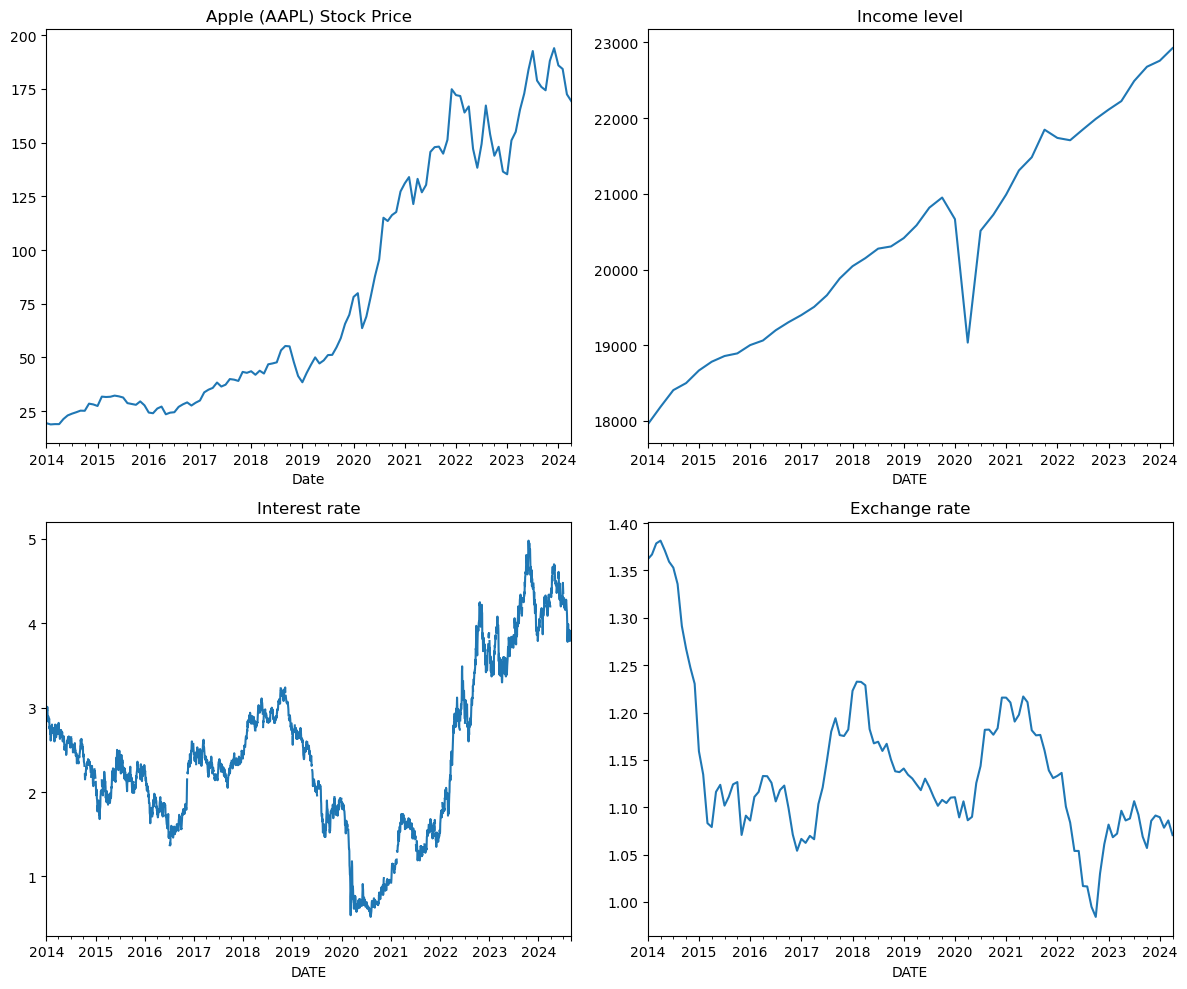

In [955]:
# Plot the data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
AAPL_April['AAPL_Spline'].plot(title='Apple (AAPL) Stock Price')
plt.subplot(2, 2, 2)
Income_level["GDPC1"].plot(title='Income level')
plt.subplot(2, 2, 3)
Interest_rate["DGS10"].plot(title='Interest rate')
plt.subplot(2, 2, 4)
Exchange_rate_months["DEXUSEU"].plot(title='Exchange rate')
plt.tight_layout()
plt.show()

In [956]:
factors =AAPL_April.join([Income_level,Interest_rate,Exchange_rate_months])
corrcoef = factors.corr()
corrcoef

,AAPL_Spline,GDPC1,DGS10,DEXUSEU
AAPL_Spline,1.000000,0.917824,0.320241,-0.372306
GDPC1,0.917824,1.000000,0.167676,-0.494246
DGS10,0.320241,0.167676,1.000000,-0.241394
DEXUSEU,-0.372306,-0.494246,-0.241394,1.000000


From the above chart about Apple's stock price and correlations with the 3 economic factors, we can see that GDPC1 (indicating the income level in our situation) has a positive and very strong correlation with Apple's stock price, which is about 0.92. It follows my previous prediction and analysis, that when people's income level increases, they will purchase more Apple products, as Apple sells consumer products. And the high sales increase the company's profit, and thus stock price. We can also see this correlation in the 4 displayed graphs, that Apple's stock price has a very similiar trend as the income level graph on the right.
The correlation between interest rate and Apple stpck price is weak, only about 0.32
And the correlation between exchange rate and Apple stpck price is negative and weak, which is about -0.37. 
The reason for that situation I guess is: the data I collected for exchange rate is not that direct. As I only collect the index between the US dollar and Euro, but Appel sells products all around the world, and maybe the exchange rate between the US dollar and the currency of countries focused on production can play a more important role.


In [958]:
from sklearn.model_selection import train_test_split
test_size = 12

train_data, test_data = train_test_split(df_resample_months, test_size=test_size, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 117
No. of testing examples: 12


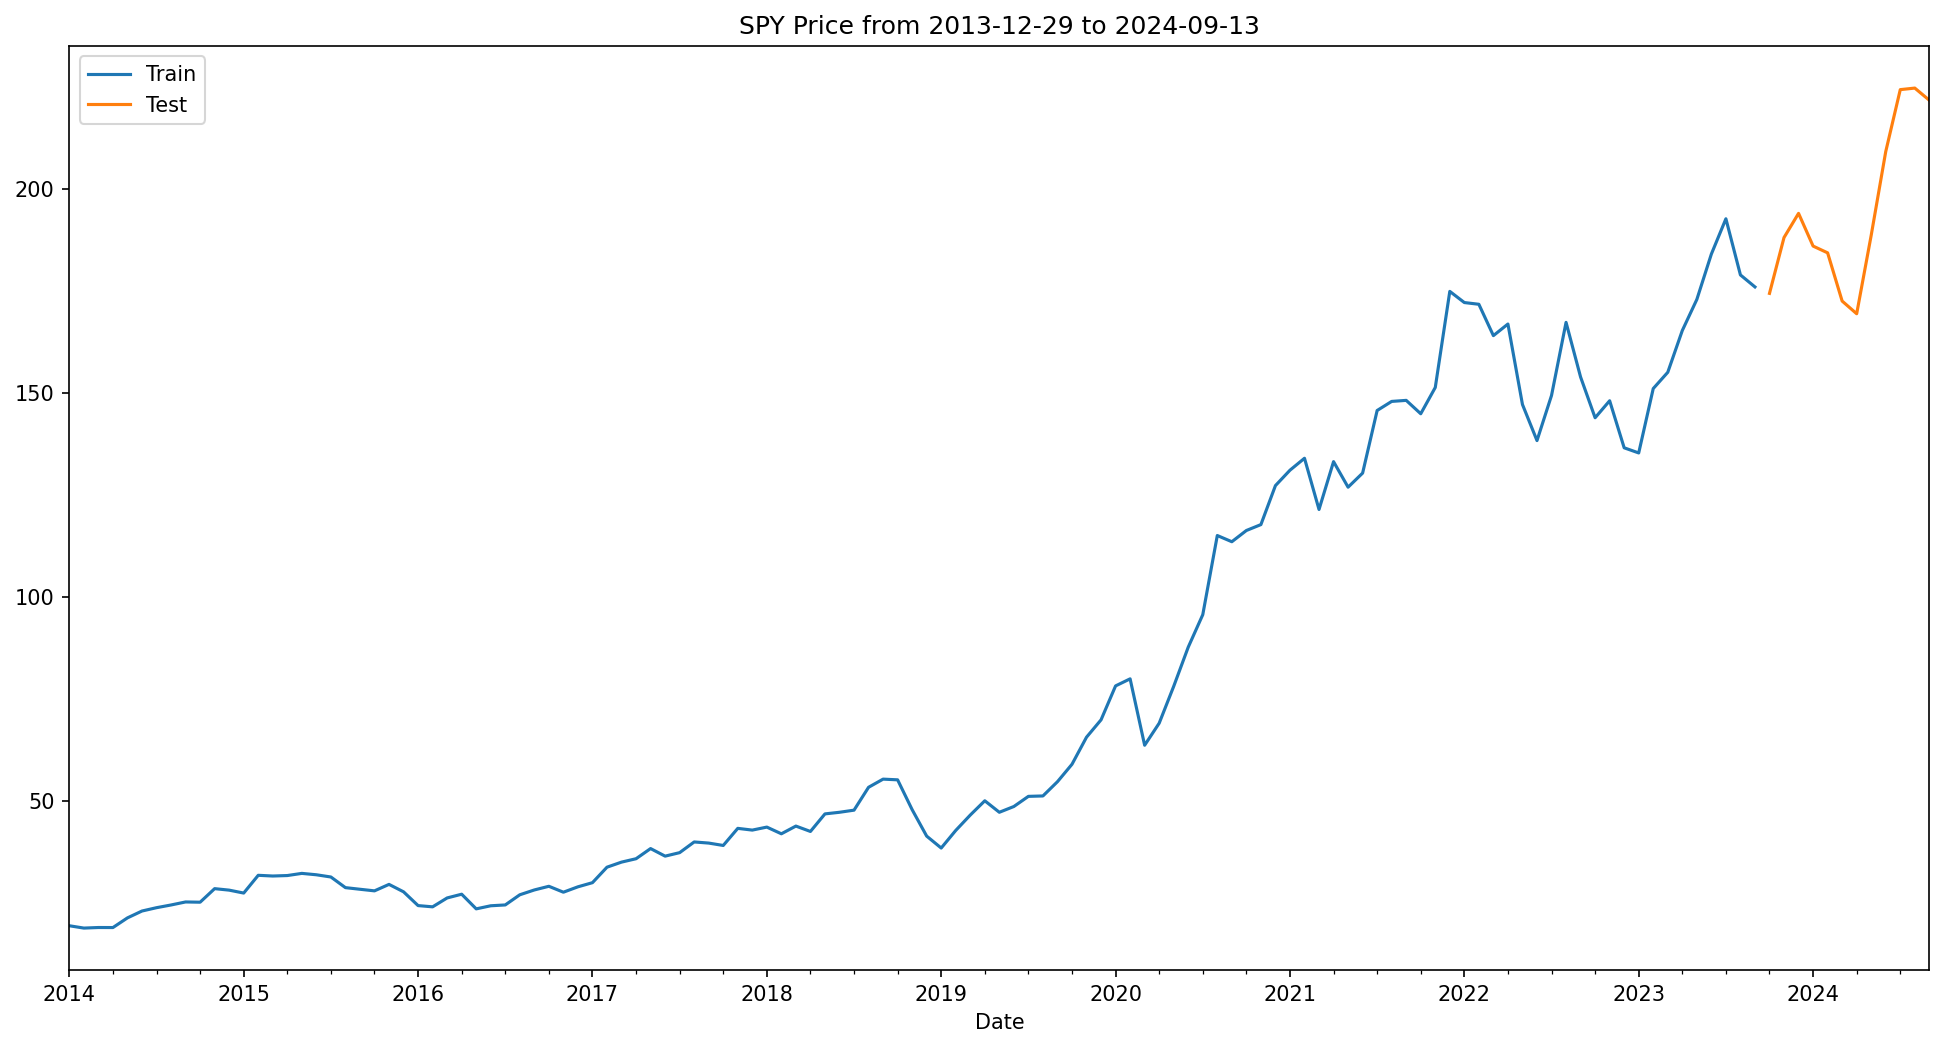

In [959]:
#Plot train and test data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
train_data['AAPL_Spline'].plot(label='Train')
test_data['AAPL_Spline'].plot(label='Test')

# adding title to the plot
plt.title('SPY Price from {} to {}'.format(stock_start_date, stock_end_date))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()

In [960]:
train_data

,AAPL_Spline
Date,
2014-01-01,19.410
2014-02-01,18.840
2014-03-01,18.980
2014-04-01,18.970
2014-05-01,21.340
...,...
2023-05-01,172.840
2023-06-01,183.960
2023-07-01,192.605


In [961]:
test_data

,AAPL_Spline
Date,
2023-10-01,174.330
2023-11-01,188.010
2023-12-01,193.935
2024-01-01,185.920
2024-02-01,184.260
2024-03-01,172.450
2024-04-01,169.340
2024-05-01,188.575
2024-06-01,209.070


Simple Exponential Smoothing

In [963]:
#First Instance
ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(12).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.5,optimized=False)
ins_cast2 = ins2.forecast(12).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(12).rename('alpha=%s'%ins3.model.params['smoothing_level'])

In [964]:
ins_cast1

2023-10-01    171.244389
2023-11-01    171.244389
2023-12-01    171.244389
2024-01-01    171.244389
2024-02-01    171.244389
2024-03-01    171.244389
2024-04-01    171.244389
2024-05-01    171.244389
2024-06-01    171.244389
2024-07-01    171.244389
2024-08-01    171.244389
2024-09-01    171.244389
Freq: MS, Name: alpha=0.2, dtype: float64

In [965]:
train_data

,AAPL_Spline
Date,
2014-01-01,19.410
2014-02-01,18.840
2014-03-01,18.980
2014-04-01,18.970
2014-05-01,21.340
...,...
2023-05-01,172.840
2023-06-01,183.960
2023-07-01,192.605


In [966]:
test_data

,AAPL_Spline
Date,
2023-10-01,174.330
2023-11-01,188.010
2023-12-01,193.935
2024-01-01,185.920
2024-02-01,184.260
2024-03-01,172.450
2024-04-01,169.340
2024-05-01,188.575
2024-06-01,209.070


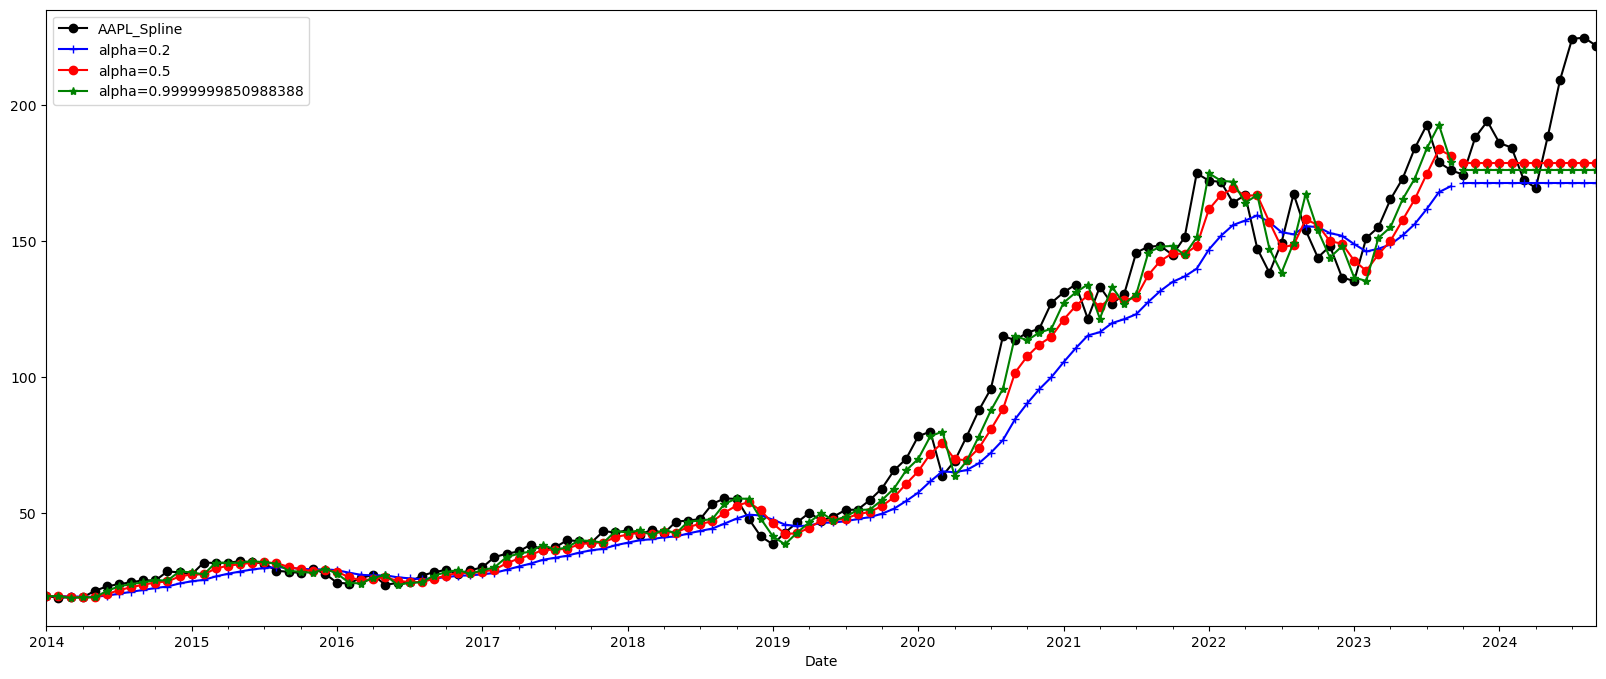

In [967]:
#After creating model we will visualize the plot
ax = df_resample_months.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.5
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

Double Exponential Smoothing

In [969]:
double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

double_ets_add_pred = double_ets_add.forecast(12)
double_ets_mul_pred = double_ets_mul.forecast(12)

In [2]:
ax = df_resample_months.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
double_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'double ets add')
double_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
double_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'double ets mul')
double_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel

plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()

NameError: name 'df_resample_months' is not defined

Triple Exponential Smoothing

In [972]:
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

triple_ets_add_pred = triple_ets_add.forecast(12)
triple_ets_mul_pred = triple_ets_mul.forecast(12)

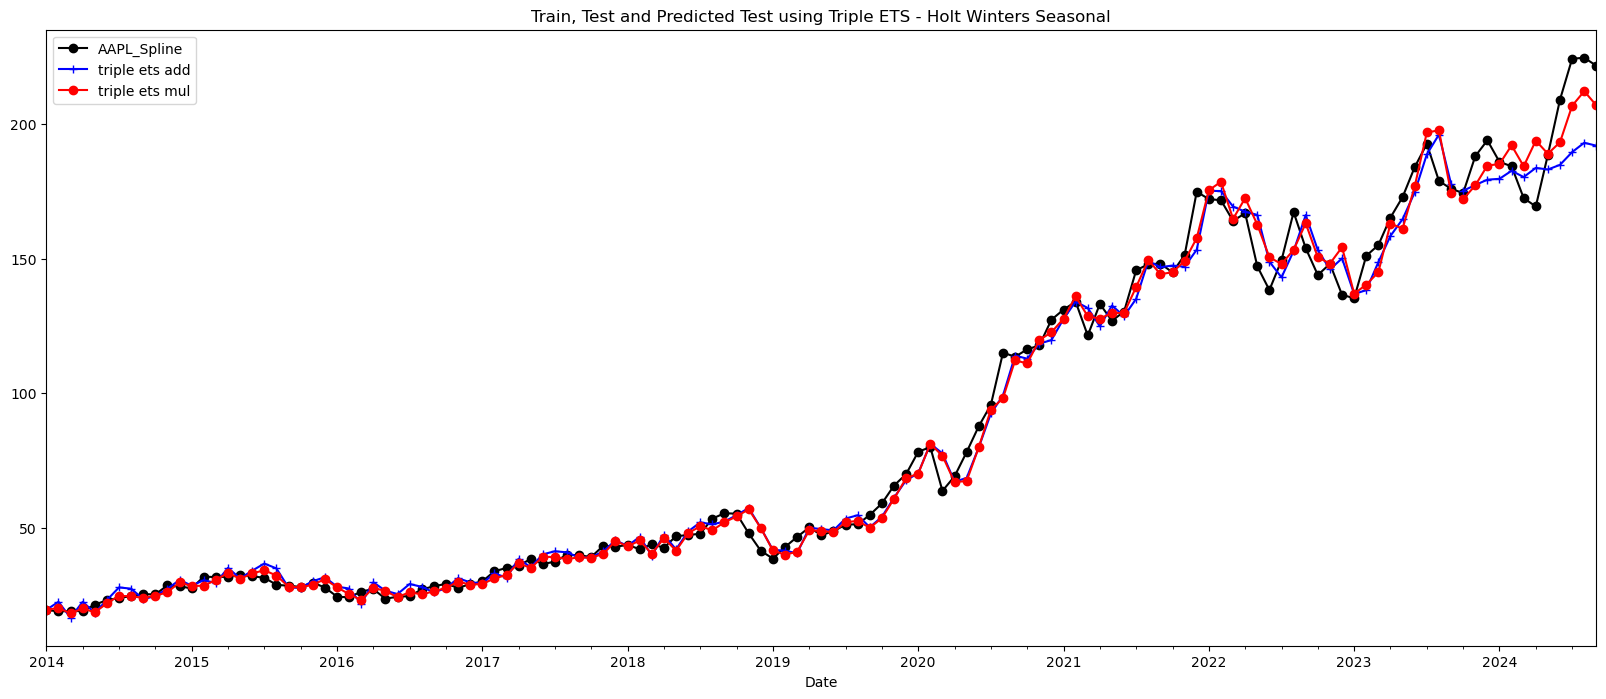

In [973]:
ax = df_resample_months.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')
triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')
triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
#ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
#ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

In [974]:
residuals = [test_data.values.flatten()[i]-triple_ets_add_pred.values.flatten()[i] for i in range(len(test_data))]
residuals = pd.DataFrame(residuals)
residuals

,0
0,-0.852816
1,10.713289
2,14.633169
3,6.303823
4,1.649200
5,-7.814641
6,-14.346713
7,5.492257
8,24.249021
9,34.692476


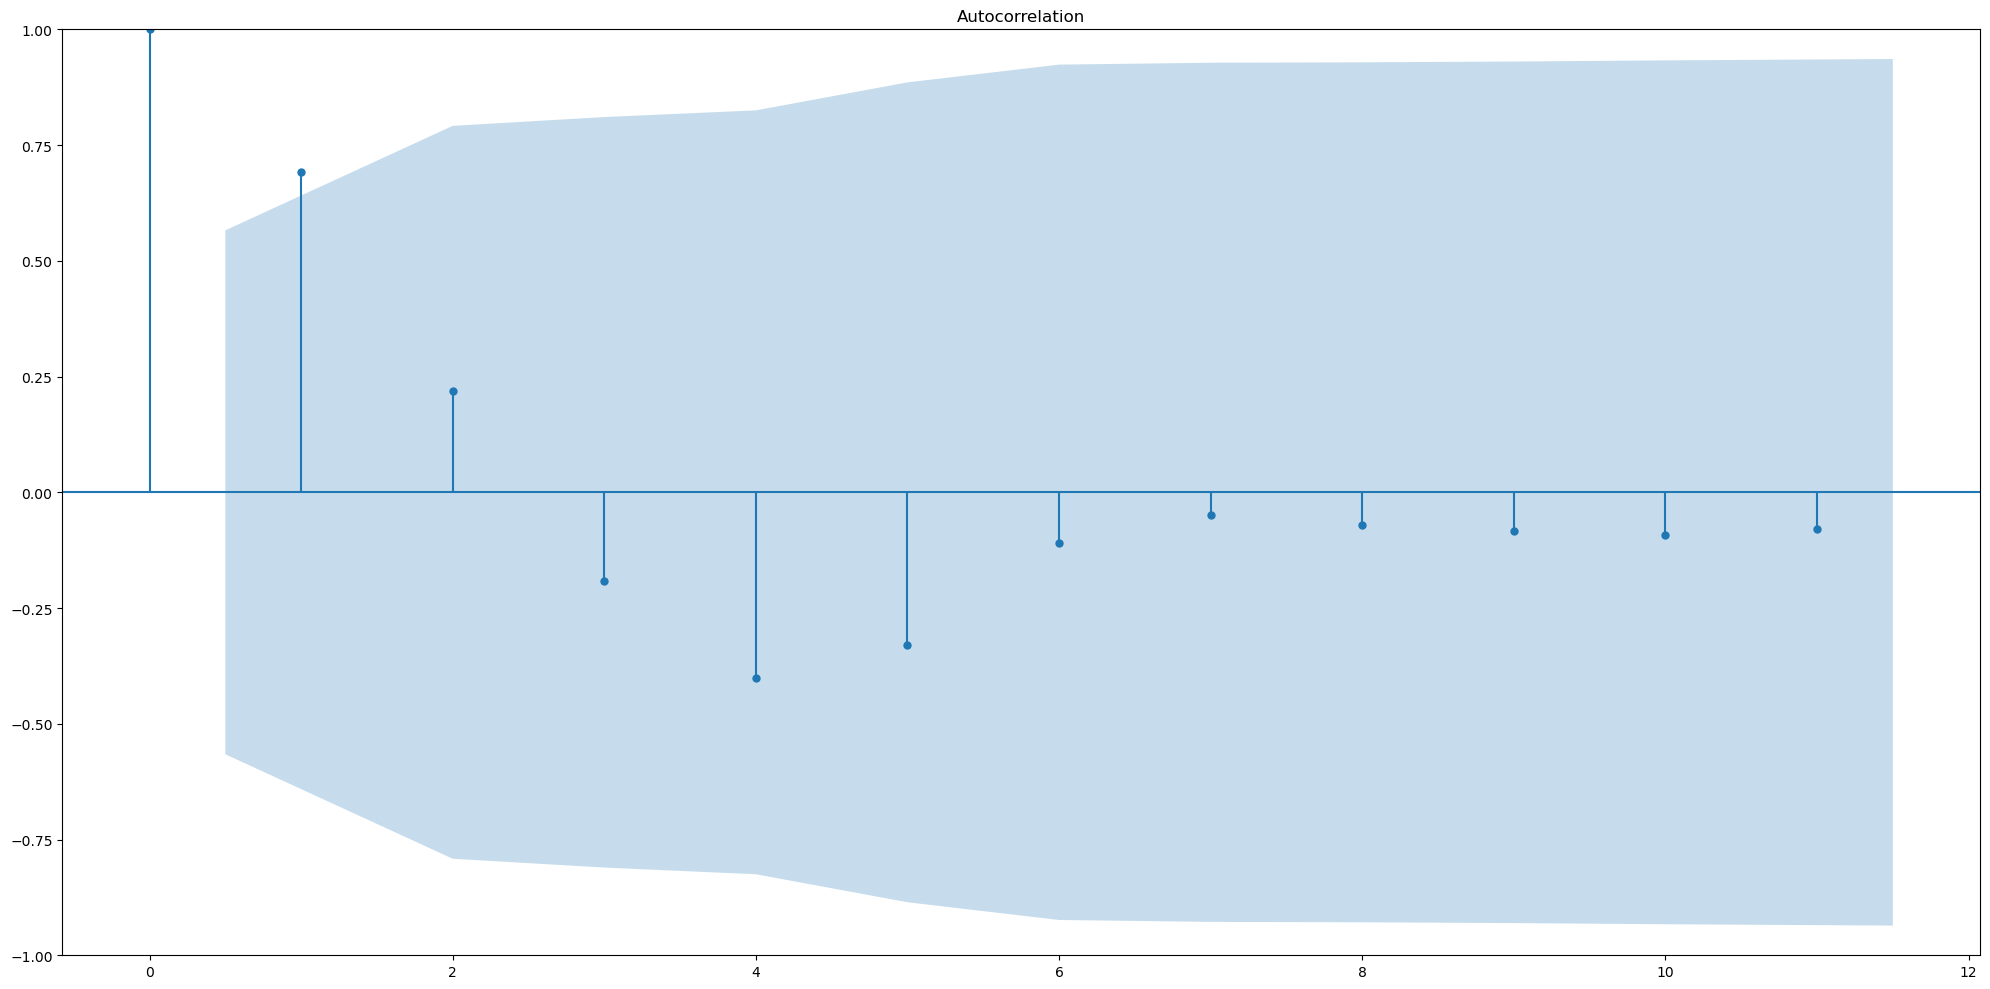

In [975]:
fig = plot_acf(residuals)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

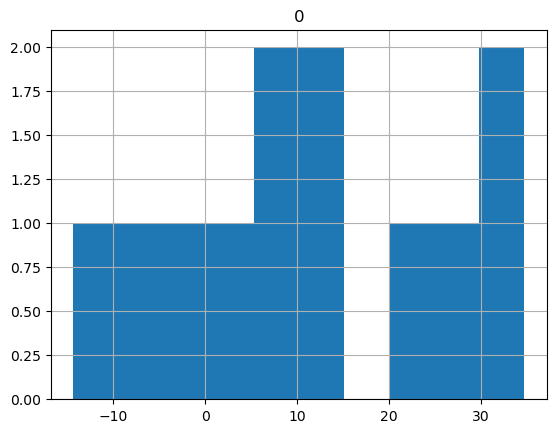

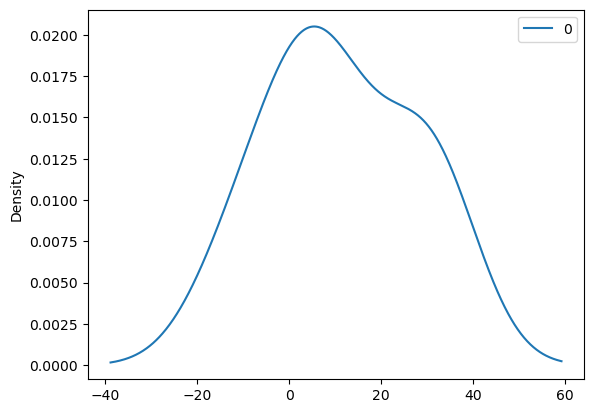

In [976]:
# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

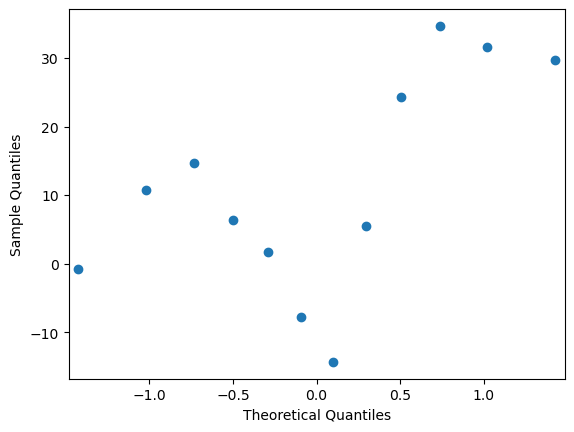

In [977]:
qqplot(residuals)
plt.show()

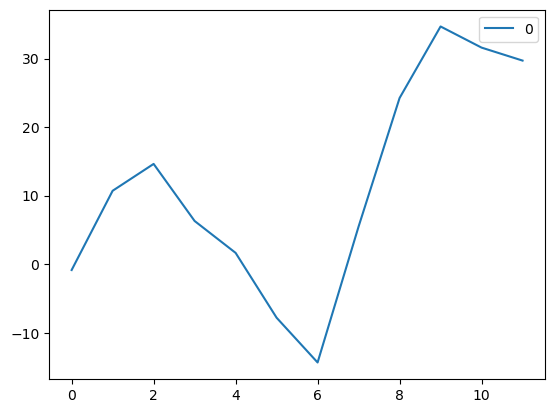

In [978]:
# plot residuals
residuals.plot()
plt.show()

Additional metrixcs:
R2(R-squared): It shows how well the data fit the regression model. The higher R2 is, a better fit between the prediction and the actual data. 
SMAPE: Symmetric mean absolute percentage error, it calculate the average of the absolute percentage errors between the actual value and predict value. It assigns equal weight to overestimations and underestimations. It values range from 0% to 100%, and lower value indicating higher accuracy.

In [980]:
from sklearn.metrics import r2_score
#define metrics dataframe which will be used below for storing results
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE','R2','SMAPE'])

def metrics_cal(actuals, predictions,model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    r2 = r2_score(actuals, predictions)
    smape = np.mean(np.abs(actuals - predictions) * 200 / (np.abs(actuals) + np.abs(predictions)))

    df = pd.DataFrame({'Model': [model],
                       'RMSE': [rmse],
                       'MAE': [mae],
                       'MAPE': [mape],
                       'R2':[r2],
                       'SMAPE':[smape]})

    global metrics_dataframe
    metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)
    return metrics_dataframe

In [981]:
#get all the metrics
metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast1.values.flatten(),
                                'Simple 0.2')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast2.values.flatten(),
                                'Simple 0.5')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast3.values.flatten(),
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_add_pred.values.flatten(),
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_mul_pred.values.flatten(),
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_add_pred.values.flatten(),
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_mul_pred.values.flatten(),
                                'Triple Mul')


/var/folders/wb/nsmcqhtd0rv2qvpccjgww7bm0000gn/T/ipykernel_9104/2804914996.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)


In [982]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,R2,SMAPE
6,Triple Mul,12.711385,10.686358,5.468419,0.571314,5.469564
4,Double Mul,14.499255,12.232972,6.210239,0.442243,6.229701
3,Double Add,19.117886,15.104048,7.365995,0.030309,7.682840
5,Triple Add,19.023432,15.172409,7.373445,0.039867,7.720260
1,Simple 0.5,25.242718,19.396764,9.301976,-0.690542,10.000792
2,Simple 1,27.018462,20.725417,9.907613,-0.936756,10.744091
0,Simple 0.2,30.448362,23.773426,11.382487,-1.459697,12.488245


In [983]:
df_resample_months.tail(12).mean()

AAPL_Spline    194.700417
dtype: float64

In [984]:
triple_ets_add_pred.values.flatten()

array([175.18281568, 177.29671118, 179.30183143, 179.61617711,
       182.6108    , 180.26464062, 183.68671271, 183.08274326,
       184.82097925, 189.55252419, 193.01722444, 191.9312658 ])

In [985]:
# Create a data frame with all the predictions along with the test data
test_pred_df = test_data.copy()

# Add all predictions
test_pred_df = test_pred_df.assign(triple_ets_mul_pred = triple_ets_mul_pred.values.flatten(),
                                   SimpleExp_1_pred = ins_cast3.values.flatten(),
                                   double_ets_add_pred = double_ets_add_pred.values.flatten())

test_pred_df

,AAPL_Spline,triple_ets_mul_pred,SimpleExp_1_pred,double_ets_add_pred
Date,,,,
2023-10-01,174.330,172.061736,175.91,177.259128
2023-11-01,188.010,177.153837,175.91,178.608257
2023-12-01,193.935,184.542376,175.91,179.957385
2024-01-01,185.920,185.116543,175.91,181.306514
2024-02-01,184.260,192.042559,175.91,182.655642
2024-03-01,172.450,184.282525,175.91,184.004771
2024-04-01,169.340,193.799758,175.91,185.353899
2024-05-01,188.575,188.926014,175.91,186.703027
2024-06-01,209.070,193.243522,175.91,188.052156


In [986]:
test_pred_df['Average_Predictions'] = (test_pred_df['SimpleExp_1_pred']+test_pred_df['triple_ets_mul_pred']+test_pred_df['double_ets_add_pred'])/3
test_pred_df

,AAPL_Spline,triple_ets_mul_pred,SimpleExp_1_pred,double_ets_add_pred,Average_Predictions
Date,,,,,
2023-10-01,174.330,172.061736,175.91,177.259128,175.076955
2023-11-01,188.010,177.153837,175.91,178.608257,177.224031
2023-12-01,193.935,184.542376,175.91,179.957385,180.136587
2024-01-01,185.920,185.116543,175.91,181.306514,180.777686
2024-02-01,184.260,192.042559,175.91,182.655642,183.536067
2024-03-01,172.450,184.282525,175.91,184.004771,181.399098
2024-04-01,169.340,193.799758,175.91,185.353899,185.021219
2024-05-01,188.575,188.926014,175.91,186.703027,183.846347
2024-06-01,209.070,193.243522,175.91,188.052156,185.735226


In [987]:
metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                test_pred_df['Average_Predictions'].values.flatten(),
                                'Average')
metrics_dataframe

,Model,RMSE,MAE,MAPE,R2,SMAPE
0,Simple 0.2,30.448362,23.773426,11.382487,-1.459697,12.488245
1,Simple 0.5,25.242718,19.396764,9.301976,-0.690542,10.000792
2,Simple 1,27.018462,20.725417,9.907613,-0.936756,10.744091
3,Double Add,19.117886,15.104048,7.365995,0.030309,7.682840
4,Double Mul,14.499255,12.232972,6.210239,0.442243,6.229701
5,Triple Add,19.023432,15.172409,7.373445,0.039867,7.720260
6,Triple Mul,12.711385,10.686358,5.468419,0.571314,5.469564
7,Average,18.834367,14.927395,7.263401,0.058857,7.587043


In [988]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,R2,SMAPE
6,Triple Mul,12.711385,10.686358,5.468419,0.571314,5.469564
4,Double Mul,14.499255,12.232972,6.210239,0.442243,6.229701
7,Average,18.834367,14.927395,7.263401,0.058857,7.587043
3,Double Add,19.117886,15.104048,7.365995,0.030309,7.682840
5,Triple Add,19.023432,15.172409,7.373445,0.039867,7.720260
1,Simple 0.5,25.242718,19.396764,9.301976,-0.690542,10.000792
2,Simple 1,27.018462,20.725417,9.907613,-0.936756,10.744091
0,Simple 0.2,30.448362,23.773426,11.382487,-1.459697,12.488245


In [989]:
test_pred_df.to_csv('test.csv', index = True, header=True)
test_pred_df.to_excel('test.xlsx', index = True, header=True)

Looking at the table sorted by MAE, the Triple Multiplicative (Triple Mul) model stands out with the lowest MAE of 10.625, and the best overall performance across all metrics (RMSE of 12.64 and MAPE of 5.44). This suggests that Triple Mul is consistently better across these different error measures, indicating that it is the most accurate and stable model for predicting the stock price. Also, the R-squared value for this model is the highest among all models, at 57.2%, indicating that it explains the most portion of the variability in the data, compared with other models.
The Double Multiplicative(Double Mul) model also predicts relatively well, with the second-best MAE (12.17) and decent RMSE and MAPE values. And R-squared value is the second highest: 44.2%. This model similarly accounts for interactions but in a less complex way than the Triple Mul model.
In contrast, models like Simple 0.2, Simple 1, and Simple 0.5 perform worse, with much higher MAE, RMSE, and MAPE values. These simpler models may not capture the underlying complexity in the data, as they are not equipped to take into consideration trends and seasonality values, leading to larger errors and lower accuracy.
Overall, the best-performing model under this situation is Triple Mul, and it's suitable for stock prediction and forecast.
